# MLP 실습 : DBSCAN (밀도기반 Clustering) - scale 미조정

## data/library 불러오기

In [107]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
# iris data set
iris=pd.read_csv("iris.csv")
iris_data=iris[iris.columns[0:4]]
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [110]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5, metric="euclidean",min_samples=5)
dbscan

DBSCAN()

## data 학습하기

- labels_ : 이상치 확인, 이상치에 따라 hyper parameter 조정하여 학습 필요

In [111]:
dbscan.fit(iris_data)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

## 학습결과 확인하기

In [112]:
pred=dbscan.fit_predict(iris_data)
pred=pd.DataFrame(pred)
pred.columns=['predict']
pred.tail(10)

,predict
140,1
141,1
142,1
143,1
144,1
145,1
146,1
147,1
148,1
149,1


## 기존 data와 예측 데이터 병합

In [113]:
match_data=pd.concat([iris,pred],axis=1)
match_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## 꽃 종류와 예측치 결과 비교

### 교차표 작성

In [114]:
cross= pd.crosstab(match_data['class'],match_data['predict'])
cross

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,6,0,44
Iris-virginica,10,0,40


### 시각화하여 결과 확인

#### PCA (주성분 분석)library import

- 4차원의 Data 2차원으로 축소하기

In [115]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(iris_data)
pca_2d=pca.transform(iris_data)

In [116]:
pca_2d.shape

(150, 2)

- Graph 그리기

Text(0.5, 1.0, 'DBSCAN finds 2 clusters and noise')

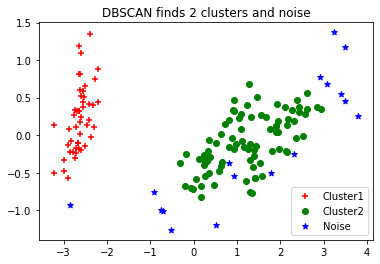

In [118]:
for i in range(0,pca_2d.shape[0]):
    if dbscan.labels_[i]==0:
        c1=plt.scatter(pca_2d[i,0],pca_2d[i,1],c="r",marker="+")
    if dbscan.labels_[i]==1:
        c2=plt.scatter(pca_2d[i,0],pca_2d[i,1],c="g",marker="o")
    if dbscan.labels_[i]==-1:
        c3=plt.scatter(pca_2d[i,0],pca_2d[i,1],c="b",marker="*")
plt.legend([c1,c2,c3],["Cluster1","Cluster2","Noise"])
plt.title("DBSCAN finds 2 clusters and noise")

# data scale 조정하여 학습


In [132]:
dbscan2=DBSCAN(eps=0.17, metric="euclidean",min_samples=5)
dbscan2

DBSCAN(eps=0.17)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
scaler2.fit(iris_data)
iris_scaled_data=scaler2.transform(iris_data)

In [134]:
pd.DataFrame(iris_scaled_data).head(5)

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## model 학습하기

In [135]:
dbscan2.fit(iris_scaled_data)
dbscan2.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

## 학습 결과 확인하기

In [136]:
pred_scaled=dbscan2.fit_predict(iris_scaled_data)
pred_scaled=pd.DataFrame(pred_scaled)
pred_scaled.columns=['predict']
pred_scaled.tail(10)

,predict
140,1
141,1
142,1
143,1
144,1
145,1
146,1
147,1
148,1
149,1


### data 병합하기

In [137]:
match_scaled_data=pd.concat([iris,pred_scaled],axis=1)
match_scaled_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class,predict
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


### 교차표 작성 (scale 조정후)

In [138]:
cross_scaled= pd.crosstab(match_scaled_data['class'],match_scaled_data['predict'])
cross_scaled

predict,-1,0,1
class,,,
Iris-setosa,1,49,0
Iris-versicolor,0,0,50
Iris-virginica,5,0,45


### 결과 시각화

In [139]:
from sklearn.decomposition import PCA
pca_scaled=PCA(n_components=2).fit(iris_scaled_data)
pca_scaled_2d=pca.transform(iris_scaled_data)
pca_scaled_2d.shape

(150, 2)

Text(0.5, 1.0, 'DBSCAN finds 2 clusters and noise')

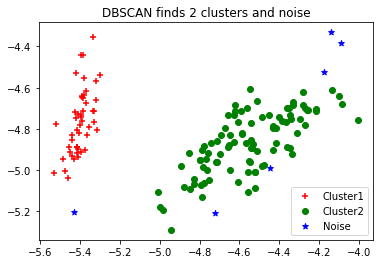

In [140]:
for i in range(0,pca_scaled_2d.shape[0]):
    if dbscan2.labels_[i]==0:
        c1=plt.scatter(pca_scaled_2d[i,0],pca_scaled_2d[i,1],c="r",marker="+")
    if dbscan2.labels_[i]==1:
        c2=plt.scatter(pca_scaled_2d[i,0],pca_scaled_2d[i,1],c="g",marker="o")
    if dbscan2.labels_[i]==-1:
        c3=plt.scatter(pca_scaled_2d[i,0],pca_scaled_2d[i,1],c="b",marker="*")
plt.legend([c1,c2,c3],["Cluster1","Cluster2","Noise"])
plt.title("DBSCAN finds 2 clusters and noise")